# Analyzing Pokemon Championship

### Read csv file from kaggle

In [1]:
pokedex_original <- read.csv('/kaggle/input/complete-pokemon-dataset-updated-090420/pokedex_(Update_05.20).csv', header=T)
pokemon_names <- read.table('/kaggle/input/pokemonnames/pokemon-names.txt', sep='\t', quote="", header=T)

In [2]:
head(pokedex_original)
names(pokedex_original)
head(pokemon_names)

,X,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,⋯,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
2,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
3,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
4,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,⋯,1,2,2,1.0,1,1,1,1,1.0,0.5
5,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5
6,5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,Fire,⋯,2,1,1,0.5,2,1,1,1,0.5,0.5


[1] "X"                "pokedex_number"   "name"             "german_name"     
 [5] "japanese_name"    "generation"       "status"           "species"         
 [9] "type_number"      "type_1"           "type_2"           "height_m"        
[13] "weight_kg"        "abilities_number" "ability_1"        "ability_2"       
[17] "ability_hidden"   "total_points"     "hp"               "attack"          
[21] "defense"          "sp_attack"        "sp_defense"       "speed"           
[25] "catch_rate"       "base_friendship"  "base_experience"  "growth_rate"     
[29] "egg_type_number"  "egg_type_1"       "egg_type_2"       "percentage_male" 
[33] "egg_cycles"       "against_normal"   "against_fire"     "against_water"   
[37] "against_electric" "against_grass"    "against_ice"      "against_fight"   
[41] "against_poison"   "against_ground"   "against_flying"   "against_psychic" 
[45] "against_bug"      "against_rock"     "against_ghost"    "against_dragon"  
[49] "against_dark"     "against_steel"    "against_fairy"

,번호,한국어,일본어,영어,프랑스어,독일어,중국어,스페인어,이탈리아어
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,이상해씨,フシギダネ,Bulbasaur,Bulbizarre,Bisasam,妙蛙種子,Bulbasaur,Bulbasaur
2,2,이상해풀,フシギソウ,Ivysaur,Herbizarre,Bisaknosp,妙蛙草,Ivysaur,Ivysaur
3,3,이상해꽃,フシギバナ,Venusaur,Florizarre,Bisaflor,妙蛙花,Venusaur,Venusaur
4,4,파이리,ヒトカゲ,Charmander,Salamèche,Glumanda,小火龍,Charmander,Charmander
5,5,리자드,リザード,Charmeleon,Reptincel,Glutexo,火恐龍,Charmeleon,Charmeleon
6,6,리자몽,リザードン,Charizard,Dracaufeu,Glurak,噴火龍,Charizard,Charizard


### preprocessing

In [3]:
library(dplyr)
library(stringr)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [4]:
pokedex_selected <- pokedex_original %>% select(pokedex_number, name, generation, status, type_number, type_1, type_2, height_m, weight_kg, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, growth_rate, percentage_male)
head(pokedex_selected)

,pokedex_number,name,generation,status,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate,percentage_male
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,Bulbasaur,1,Normal,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45,Medium Slow,87.5
2,2,Ivysaur,1,Normal,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45,Medium Slow,87.5
3,3,Venusaur,1,Normal,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45,Medium Slow,87.5
4,3,Mega Venusaur,1,Normal,2,Grass,Poison,2.4,155.5,625,80,100,123,122,120,80,45,Medium Slow,87.5
5,4,Charmander,1,Normal,1,Fire,,0.6,8.5,309,39,52,43,60,50,65,45,Medium Slow,87.5
6,5,Charmeleon,1,Normal,1,Fire,,1.1,19.0,405,58,64,58,80,65,80,45,Medium Slow,87.5


In [5]:
pokedex <- pokedex_selected
pokedex <- pokedex %>% filter(!str_detect(pokedex$name, "Mega"))
pokedex <- pokedex %>% filter(!str_detect(pokedex$name, "Eternamax"))

In [6]:
pokedex_kor <- merge(x=pokedex, y=pokemon_names[,1:2], by.x='pokedex_number', by.y='번호')
pokedex_kor <- pokedex_kor %>% select(pokedex_number, name, 한국어, generation, status, type_number, type_1, type_2, height_m, weight_kg, total_points, hp, attack, defense, sp_attack, sp_defense, speed, catch_rate, growth_rate, percentage_male)
names(pokedex_kor)[2:3] <- c('eng_name', 'kor_name')
head(pokedex_kor)

,pokedex_number,eng_name,kor_name,generation,status,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate,percentage_male
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,Bulbasaur,이상해씨,1,Normal,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45,Medium Slow,87.5
2,2,Ivysaur,이상해풀,1,Normal,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45,Medium Slow,87.5
3,3,Venusaur,이상해꽃,1,Normal,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45,Medium Slow,87.5
4,4,Charmander,파이리,1,Normal,1,Fire,,0.6,8.5,309,39,52,43,60,50,65,45,Medium Slow,87.5
5,5,Charmeleon,리자드,1,Normal,1,Fire,,1.1,19.0,405,58,64,58,80,65,80,45,Medium Slow,87.5
6,6,Charizard,리자몽,1,Normal,2,Fire,Flying,1.7,90.5,534,78,84,78,109,85,100,45,Medium Slow,87.5


## 분석

## Topic: 세대 별 600족 분포

### 세대별 600족 분포

In [7]:
total600 <- pokedex_kor[pokedex_kor$total_points >= 600, ]

In [8]:
points_count <- t(aggregate(total600$kor_name, list(total600$generation), length))
rownames(points_count) <- c("Gen", "Count")
points_count

Gen,1,2,3,4,5,6,7,8
Count,3,4,15,13,12,10,12,6


In [9]:
points_names <- aggregate(total600$kor_name, list(total600$generation), paste)
colnames(points_names) <- c("Gen", "Count")
points_names

Gen,Count
<int>,<list>
1,"망나뇽, 뮤츠 , 뮤"
2,"마기라스, 루기아 , 칠색조 , 세레비"
3,"게을킹 , 보만다 , 메타그로스, 라티아스 , 라티오스 , 가이오가 , 가이오가 , 그란돈 , 그란돈 , 레쿠쟈 , 지라치 , 테오키스 , 테오키스 , 테오키스 , 테오키스"
4,"한카리아스, 디아루가 , 펄기아 , 히드런 , 레지기가스, 기라티나 , 기라티나 , 크레세리아, 마나피 , 다크라이 , 쉐이미 , 쉐이미 , 아르세우스"
5,"비크티니 , 삼삼드래 , 레시라무 , 제크로무 , 랜드로스 , 랜드로스 , 큐레무 , 큐레무 , 큐레무 , 메로엣타 , 메로엣타 , 게노세크트"
6,"개굴닌자 , 미끄래곤 , 제르네아스, 이벨타르 , 지가르데 , 지가르데 , 디안시 , 후파 , 후파 , 볼케니온"
7,"약어리 , 짜랑고우거, 솔가레오 , 루나아라 , 네크로즈마, 네크로즈마, 네크로즈마, 네크로즈마, 마기아나 , 마샤도 , 제라오라 , 멜메탈"
8,"드래펄트 , 자시안 , 자시안 , 자마젠타 , 자마젠타 , 무한다이노"


### 비전설, 비환상종

In [10]:
total600_normal <- total600[total600$status == 'Normal', ]

In [11]:
points_normal_count <- t(aggregate(total600_normal$kor_name, list(total600_normal$generation), length))
rownames(points_normal_count) <- c("Gen", "Count")
points_normal_count

Gen,1,2,3,4,5,6,7,8
Count,1,1,3,1,1,2,2,1


In [12]:
points_normal_names <- aggregate(total600_normal$kor_name, list(total600_normal$generation), paste)
colnames(points_normal_names) <- c("Gen", "kor_names")
points_normal_names

Gen,kor_names
<int>,<list>
1,망나뇽
2,마기라스
3,"게을킹 , 보만다 , 메타그로스"
4,한카리아스
5,삼삼드래
6,"개굴닌자, 미끄래곤"
7,"약어리 , 짜랑고우거"
8,드래펄트


## Topic: 세대별 종족값 분포

In [13]:
total_points_mean <- data.frame()
for (i in 1:8) total_points_mean[1, i] <- mean(pokedex_kor[pokedex_kor$generation==i, ]$total_points)
colnames(total_points_mean) <- paste("Gen", 1:8, sep="")
rownames(total_points_mean) <- "Mean"
total_points_mean

,Gen1,Gen2,Gen3,Gen4,Gen5,Gen6,Gen7,Gen8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,406.9831,406.03,412.1586,451.931,434.5118,439.4881,459.2323,430.4368


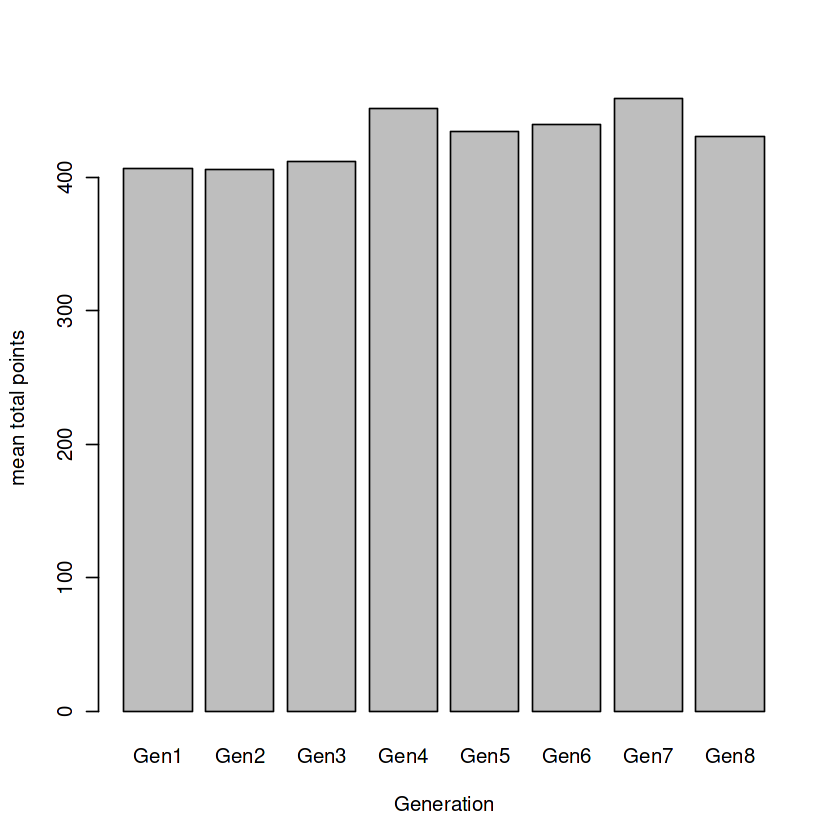

In [14]:
barplot(unlist(total_points_mean[1,]), xlab='Generation', ylab='mean total points')

In [15]:
range(pokedex_kor$total_points)

[1] 175 770

In [16]:
points_groups <- list()
for (i in 1:8){
    total_points_geni <- pokedex_kor[pokedex_kor$generation==i,]$total_points
    cut_geni <- cut(total_points_geni, 1:8*100-1)
    points_groups[[i]] <- aggregate(total_points_geni, list(cut_geni), length, drop=F)
    points_groups[[i]][is.na(points_groups[[i]])] <- 0
    names(points_groups[[i]])[2] <- paste("Gen",as.character(i),sep="")
    if (i>1) points_table <- merge(points_table, points_groups[[i]], by="Group.1", all=T)
    else points_table <- points_groups[[i]]
}
names(points_table)[1] <- "Group"

In [17]:
points_table <- points_table[order(points_table$Group), ]
rownames(points_table) <- 1:7
points_table

,Group,Gen1,Gen2,Gen3,Gen4,Gen5,Gen6,Gen7,Gen8
,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,"(99,199]",2,1,3,1,0,0,1,2
2,"(199,299]",22,17,27,11,17,7,11,15
3,"(299,399]",55,21,29,24,50,25,14,12
4,"(399,499]",61,37,58,32,57,25,35,30
5,"(499,599]",34,20,13,35,34,17,26,22
6,"(599,699]",3,4,13,12,10,9,11,4
7,"(699,799]",0,0,2,1,2,1,1,2


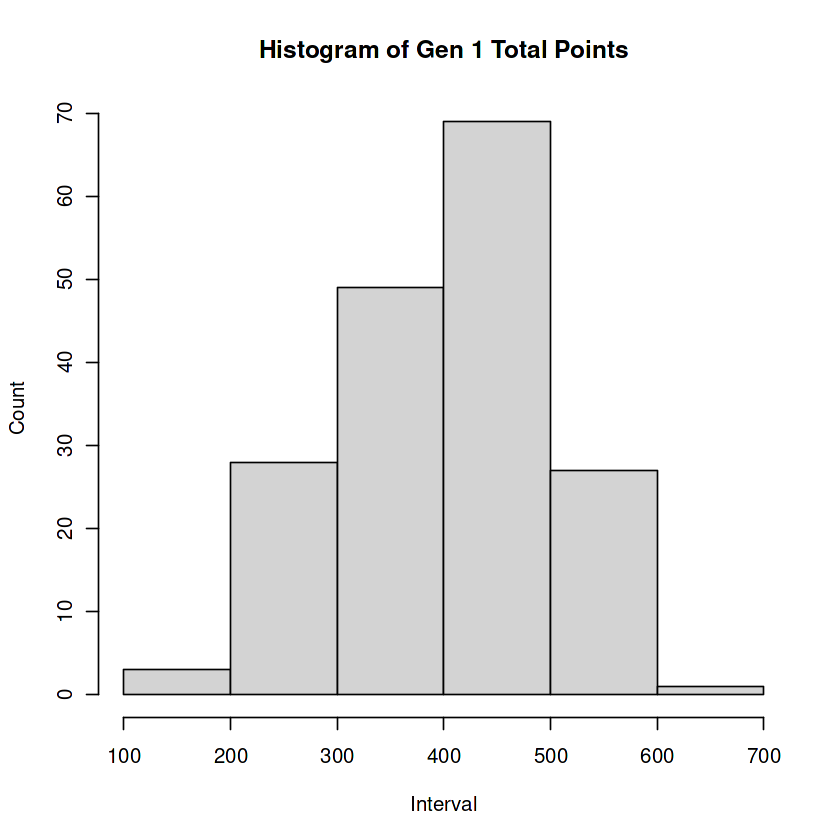

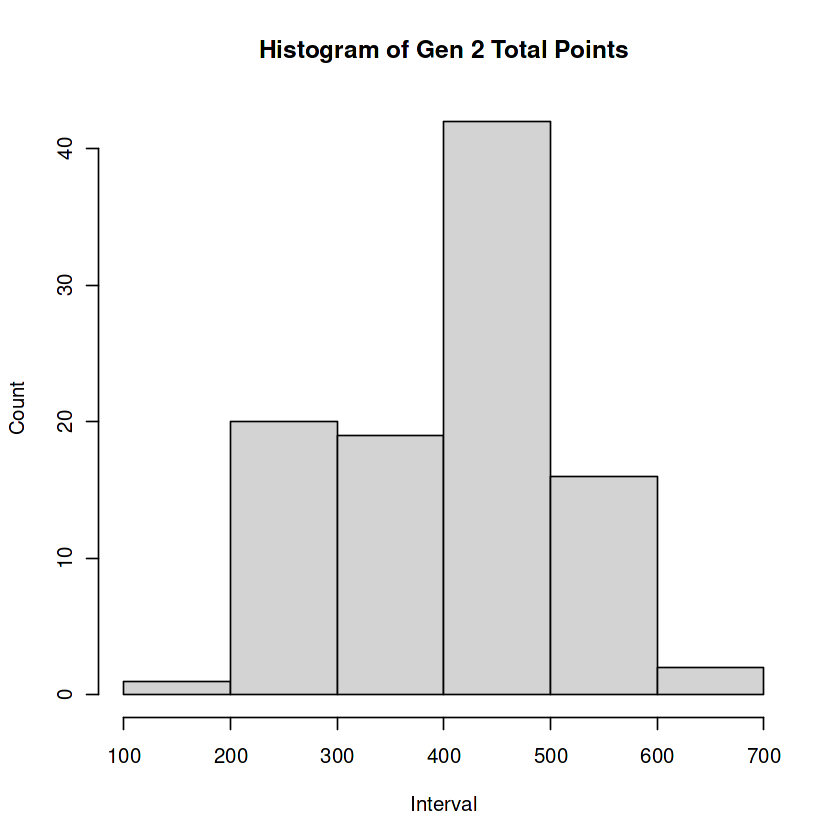

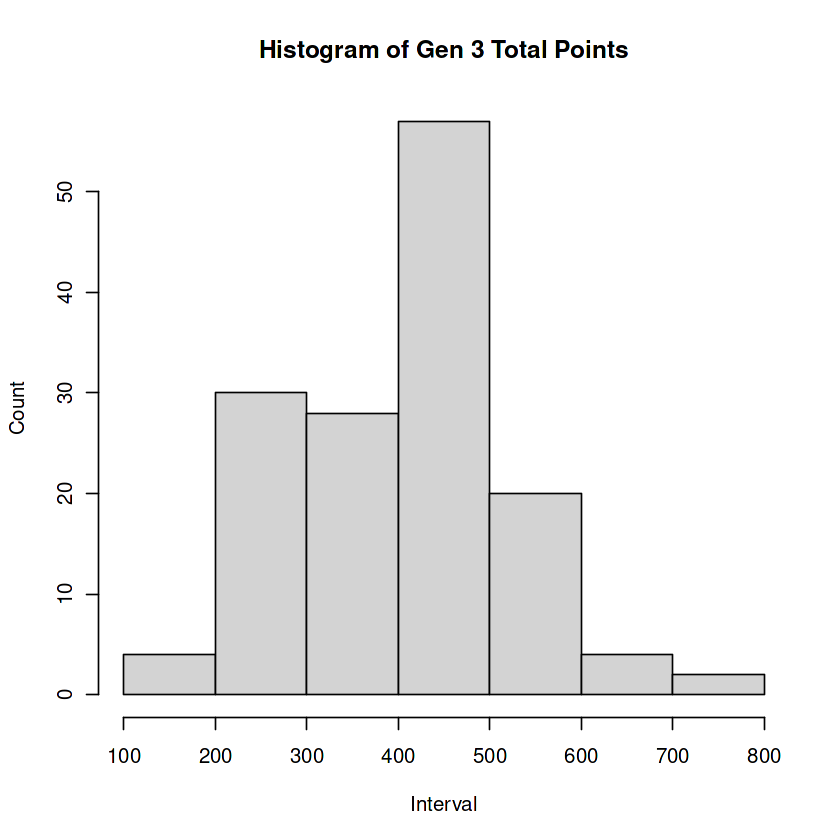

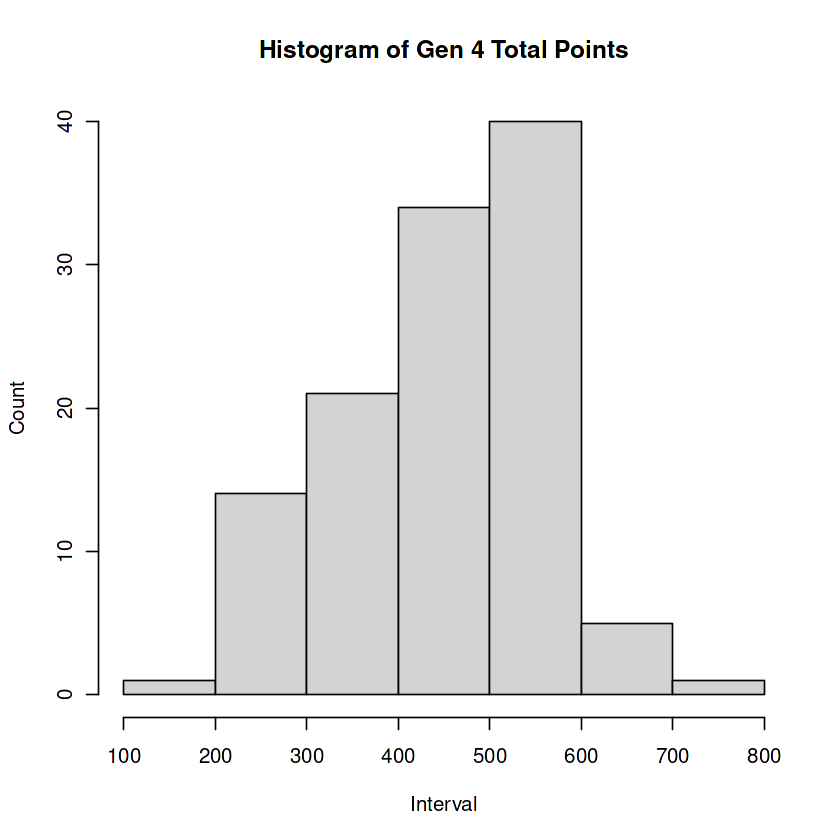

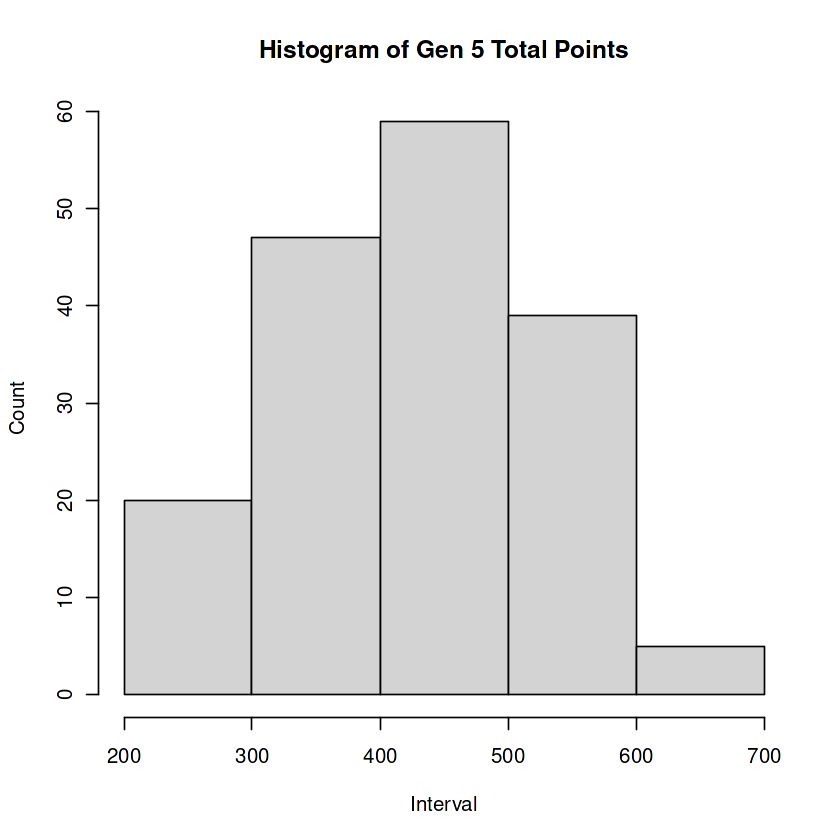

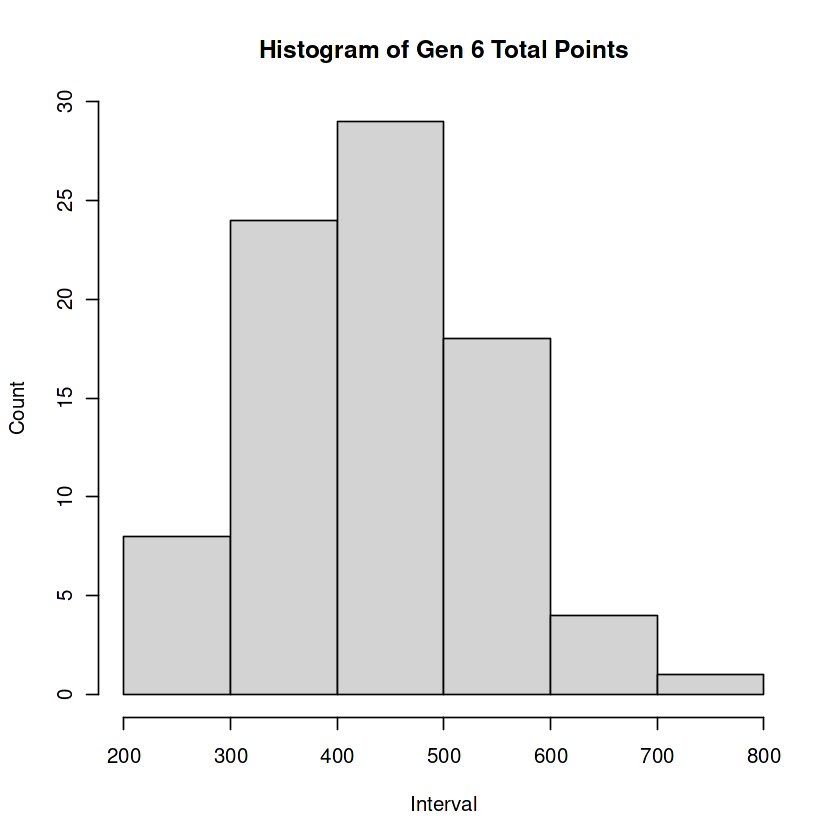

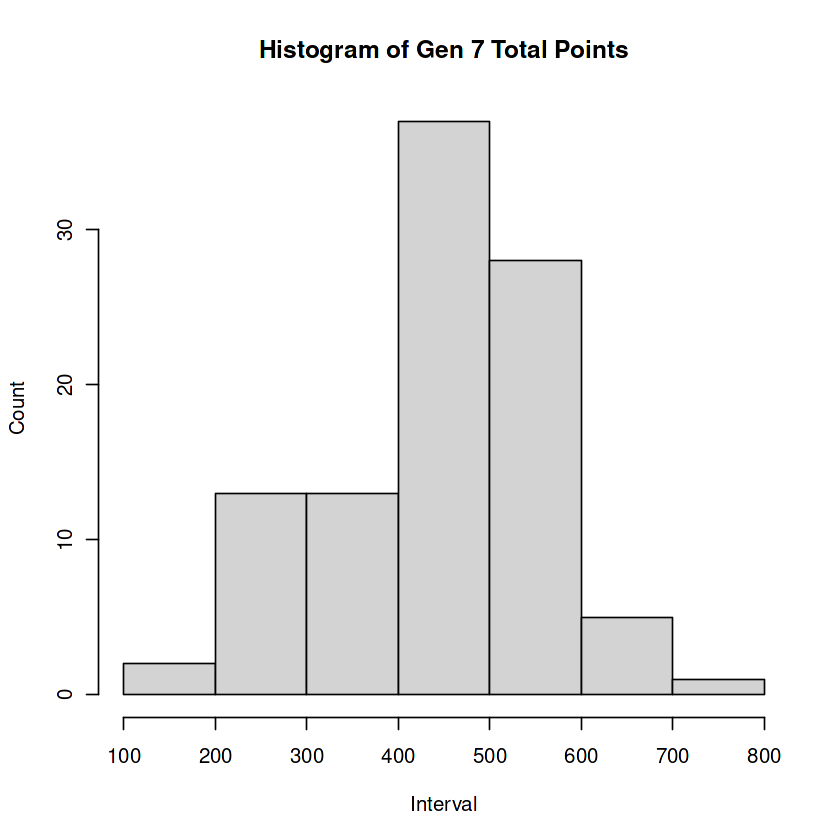

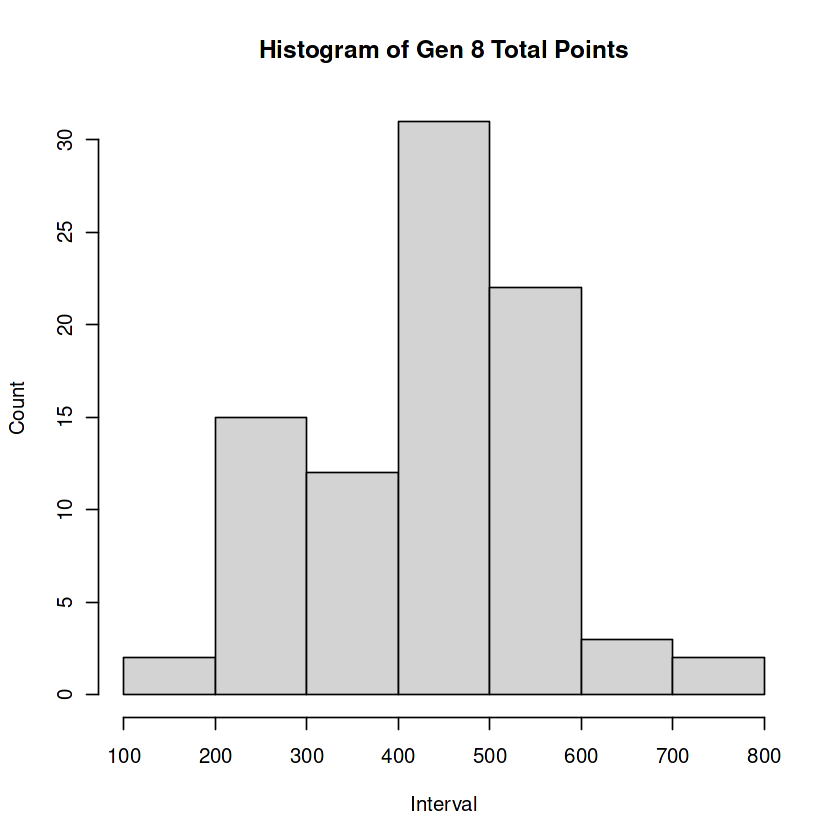

In [18]:
for (i in 1:8) hist(pokedex_kor[pokedex_kor$generation==i,]$total_points, nclass=6, main=paste("Histogram of Gen", i, "Total Points"), xlab="Interval", ylab="Count")

## Topic: 성장률에 미치는 값은 무엇인가 ?

In [19]:
head(pokedex_kor)

,pokedex_number,eng_name,kor_name,generation,status,type_number,type_1,type_2,height_m,weight_kg,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,growth_rate,percentage_male
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,Bulbasaur,이상해씨,1,Normal,2,Grass,Poison,0.7,6.9,318,45,49,49,65,65,45,45,Medium Slow,87.5
2,2,Ivysaur,이상해풀,1,Normal,2,Grass,Poison,1.0,13.0,405,60,62,63,80,80,60,45,Medium Slow,87.5
3,3,Venusaur,이상해꽃,1,Normal,2,Grass,Poison,2.0,100.0,525,80,82,83,100,100,80,45,Medium Slow,87.5
4,4,Charmander,파이리,1,Normal,1,Fire,,0.6,8.5,309,39,52,43,60,50,65,45,Medium Slow,87.5
5,5,Charmeleon,리자드,1,Normal,1,Fire,,1.1,19.0,405,58,64,58,80,65,80,45,Medium Slow,87.5
6,6,Charizard,리자몽,1,Normal,2,Fire,Flying,1.7,90.5,534,78,84,78,109,85,100,45,Medium Slow,87.5


In [20]:
# Run Once
pokedex_kor[pokedex_kor$growth_rate == "", ]$growth_rate <- "Medium Slow"

In [21]:
levels(factor(pokedex_kor$growth_rate))

[1] "Erratic"     "Fast"        "Fluctuating" "Medium Fast" "Medium Slow"
[6] "Slow"

- Erratic: 600,000 exp at level 100
- Fast: 800,000 exp at level 100
- medium fast: 1,000,000 exp at level 100
- medium slow: 1,059,860 exp at level 100
- slow: 1,250,000 exp at level 100
- Fluctuating: 1,640,000 exp at level 100  
Source: http://bulbapedia.bulbagarden.net/wiki/Experience

In [22]:
levels(factor(pokedex_kor$status))

[1] "Legendary"     "Mythical"      "Normal"        "Sub Legendary"

In [23]:
pokedex_gr <- pokedex_kor %>% select(pokedex_number, growth_rate, generation, status, height_m, weight_kg, total_points, hp, attack, sp_attack, sp_defense, speed)
head(pokedex_gr)

,pokedex_number,growth_rate,generation,status,height_m,weight_kg,total_points,hp,attack,sp_attack,sp_defense,speed
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Medium Slow,1,Normal,0.7,6.9,318,45,49,65,65,45
2,2,Medium Slow,1,Normal,1.0,13.0,405,60,62,80,80,60
3,3,Medium Slow,1,Normal,2.0,100.0,525,80,82,100,100,80
4,4,Medium Slow,1,Normal,0.6,8.5,309,39,52,60,50,65
5,5,Medium Slow,1,Normal,1.1,19.0,405,58,64,80,65,80
6,6,Medium Slow,1,Normal,1.7,90.5,534,78,84,109,85,100


In [24]:
gr <- c("Erratic", "Fast", "Medium Fast", "Medium Slow", "Slow", "Fluctuating")
str_to_num <- function(df){
    for (i in 1:6) if (df[2] == gr[i]) df[2] <- i*10
    df[4] <- ifelse(df[4] == "Normal", 0, 1)
    df
}
pokedex_gr <- as.data.frame(t(apply(pokedex_gr, 1, str_to_num)))
pokedex_gr <- as.data.frame(sapply(pokedex_gr, as.numeric))
head(pokedex_gr)

,pokedex_number,growth_rate,generation,status,height_m,weight_kg,total_points,hp,attack,sp_attack,sp_defense,speed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,40,1,0,0.7,6.9,318,45,49,65,65,45
2,2,40,1,0,1.0,13.0,405,60,62,80,80,60
3,3,40,1,0,2.0,100.0,525,80,82,100,100,80
4,4,40,1,0,0.6,8.5,309,39,52,60,50,65
5,5,40,1,0,1.1,19.0,405,58,64,80,65,80
6,6,40,1,0,1.7,90.5,534,78,84,109,85,100


In [25]:
attach(pokedex_gr)

In [26]:
model1_gr <- lm(growth_rate ~ generation + factor(status) + height_m + weight_kg + total_points + hp + attack + sp_attack + sp_defense + speed)
summary(model1_gr)


Call:
lm(formula = growth_rate ~ generation + factor(status) + height_m + 
    weight_kg + total_points + hp + attack + sp_attack + sp_defense + 
    speed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.252  -4.881  -2.390   5.523  27.351 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     32.502103   1.406840  23.103   <2e-16 ***
generation      -0.075879   0.130739  -0.580   0.5618    
factor(status)1 12.799325   1.164639  10.990   <2e-16 ***
height_m         0.290577   0.305802   0.950   0.3422    
weight_kg        0.005444   0.003454   1.576   0.1153    
total_points    -0.002592   0.013521  -0.192   0.8480    
hp               0.015648   0.018062   0.866   0.3865    
attack           0.037610   0.022106   1.701   0.0892 .  
sp_attack        0.018860   0.017217   1.095   0.2736    
sp_defense      -0.040647   0.024534  -1.657   0.0979 .  
speed            0.006831   0.015879   0.430   0.6672    
---
Signif. codes:  0 ‘***’ 0.001 ‘**

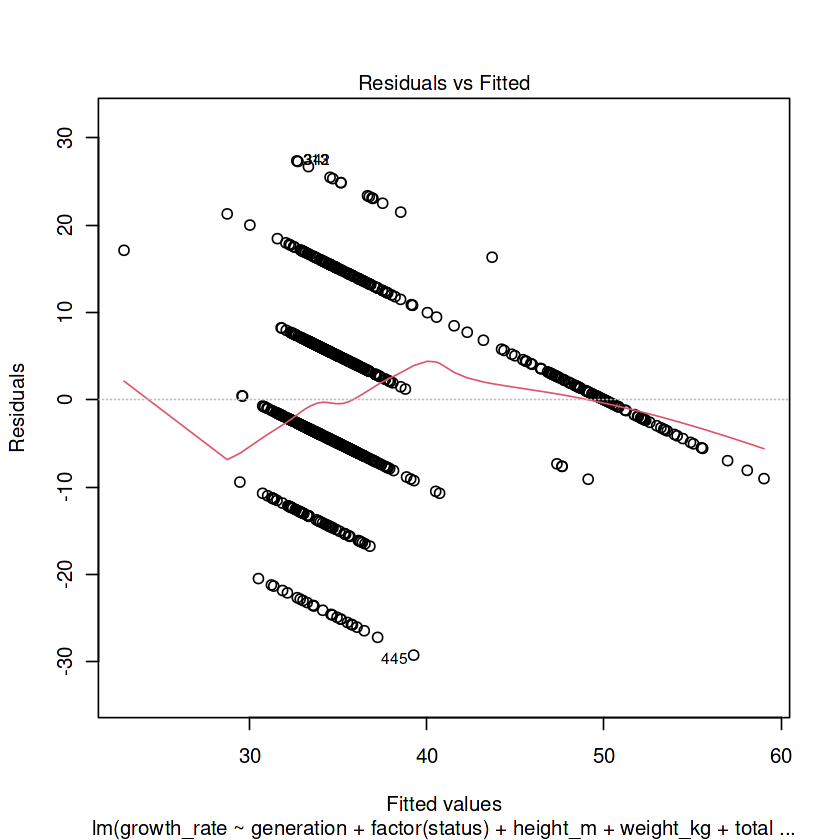

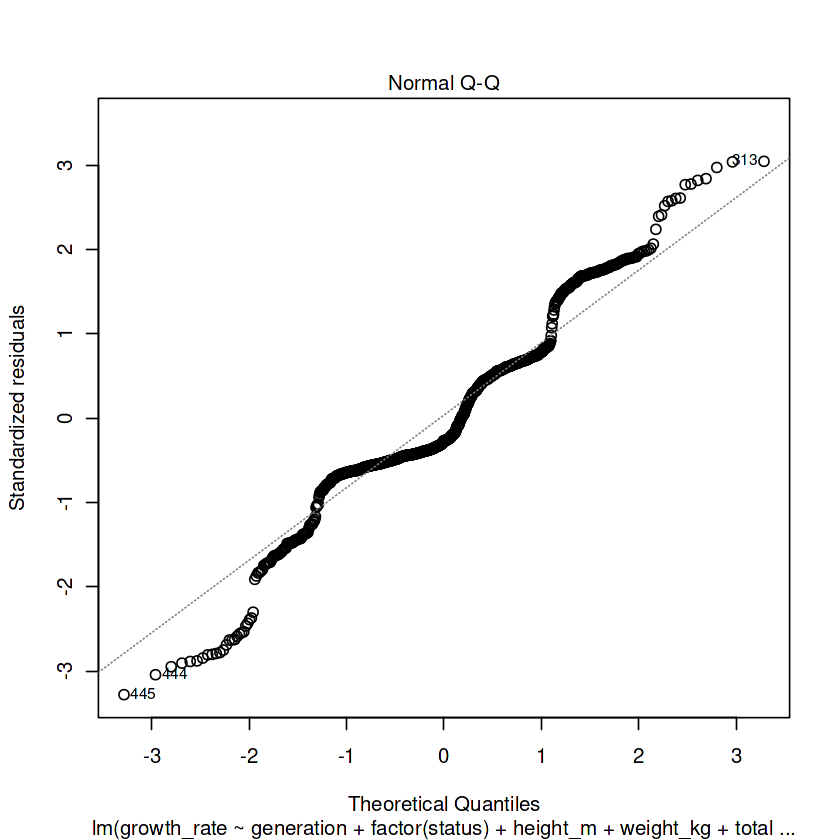

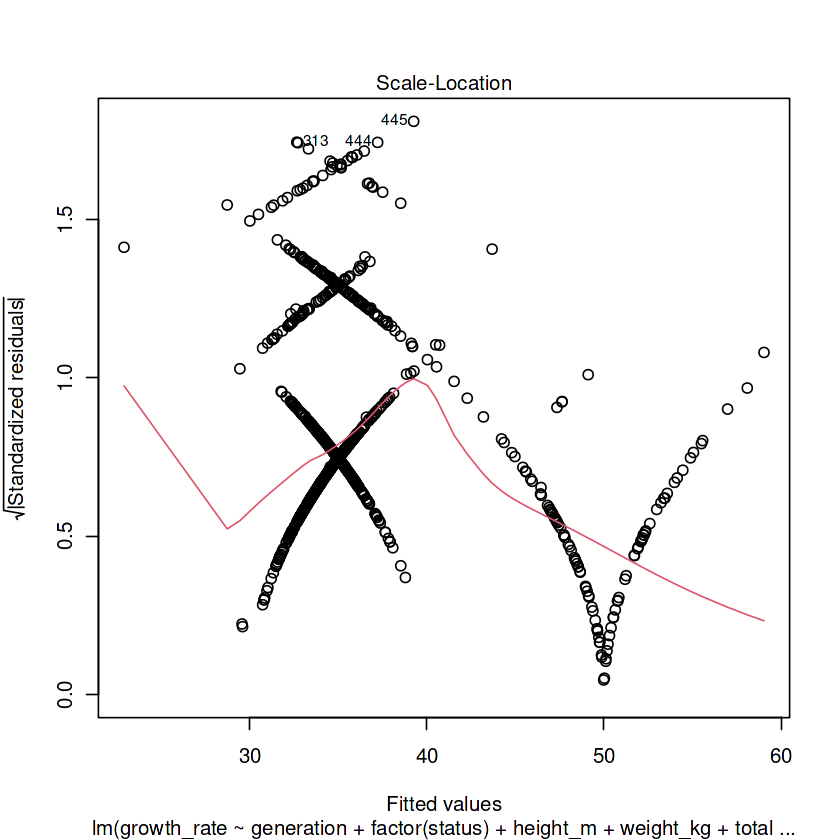

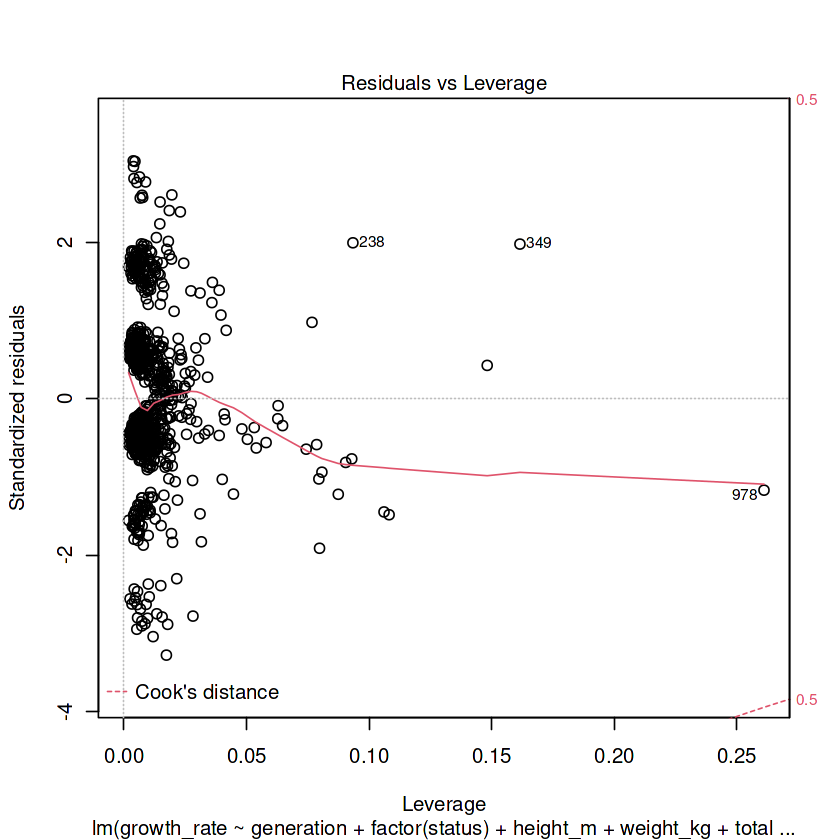

In [27]:
plot(model1_gr)

In [28]:
model2_gr <- lm(growth_rate ~ factor(status) + attack + sp_defense)
summary(model2_gr)


Call:
lm(formula = growth_rate ~ factor(status) + attack + sp_defense)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.728  -4.924  -2.559   5.485  27.451 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     32.52959    1.06710  30.484  < 2e-16 ***
factor(status)1 14.19756    1.05104  13.508  < 2e-16 ***
attack           0.05232    0.01021   5.123 3.62e-07 ***
sp_defense      -0.02870    0.01148  -2.501   0.0126 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.033 on 974 degrees of freedom
Multiple R-squared:  0.2331,	Adjusted R-squared:  0.2307 
F-statistic: 98.68 on 3 and 974 DF,  p-value: < 2.2e-16


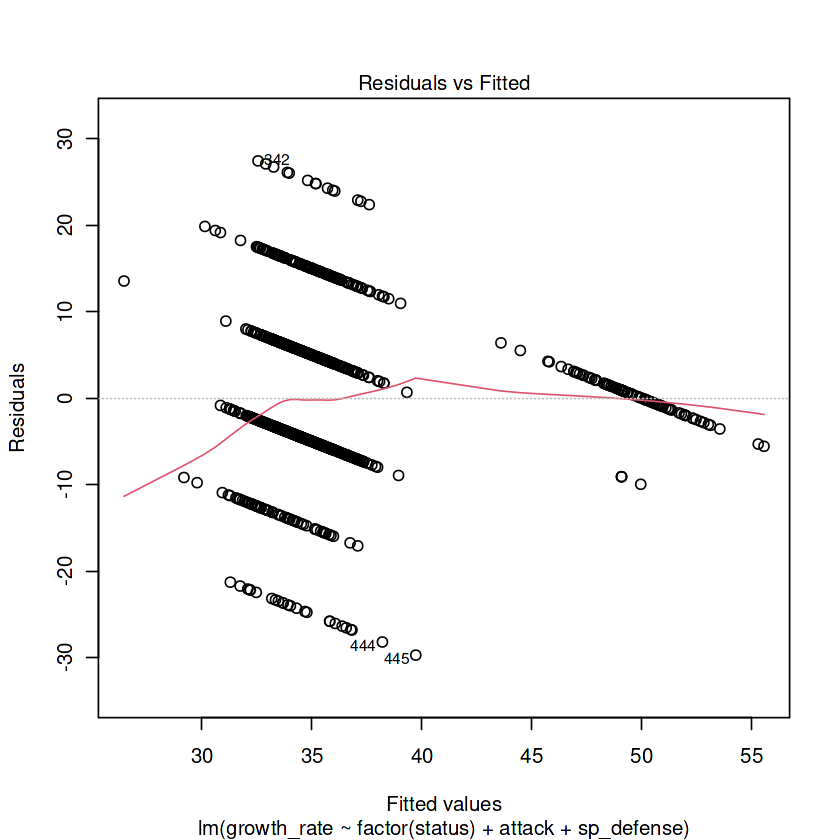

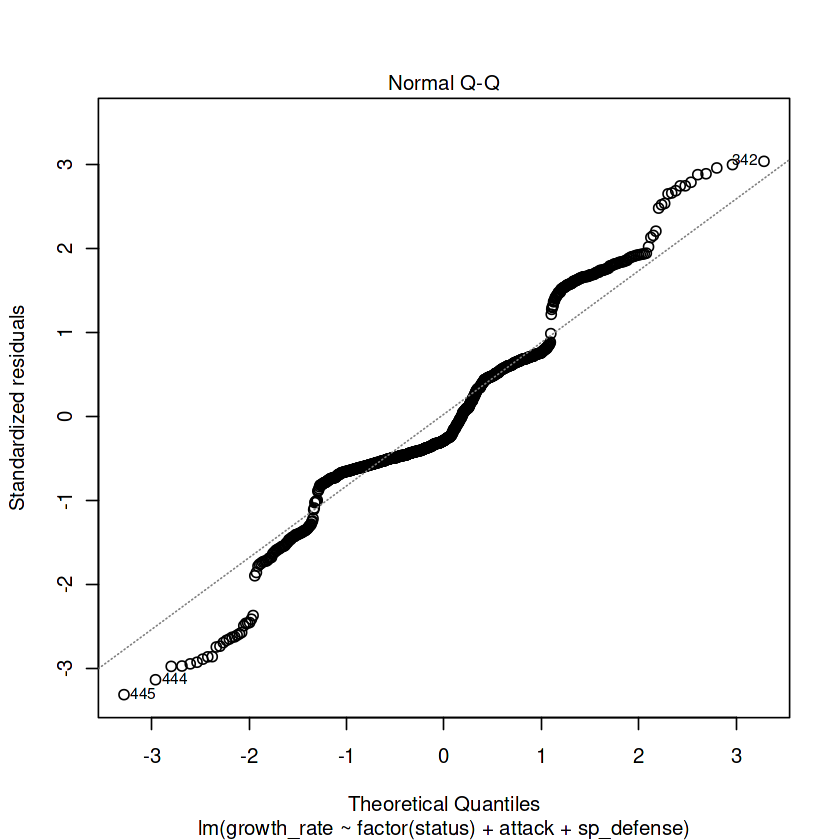

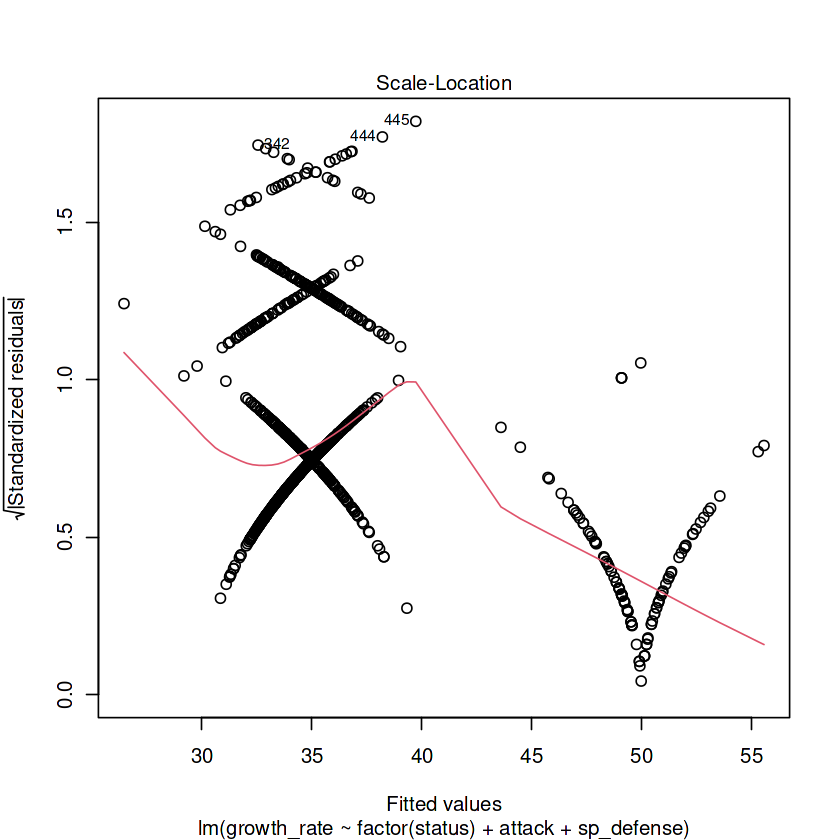

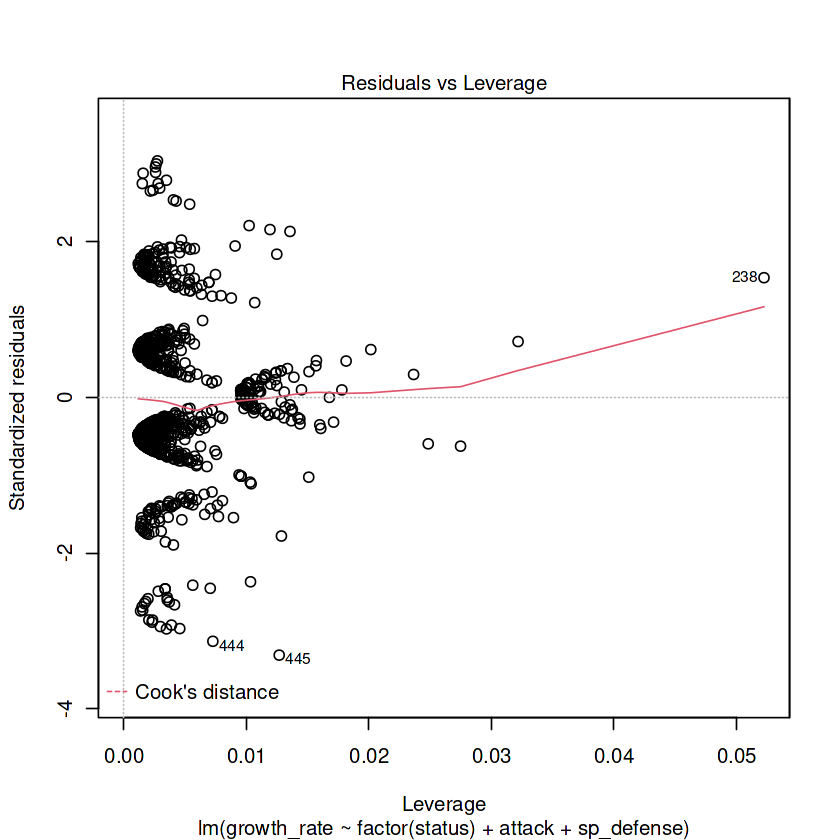

In [29]:
plot(model2_gr)

In [30]:
anova(model2_gr, model1_gr)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,974,79477.44,NA,NA,NA,NA
2,967,78384.71,7,1092.738,1.925808,0.06246784


In [31]:
model3_gr <- lm(growth_rate ~ factor(status))
summary(model3_gr)


Call:
lm(formula = growth_rate ~ factor(status))

Residuals:
    Min      1Q  Median      3Q     Max 
-24.473  -4.473  -4.473   5.527  25.527 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.4725     0.3103  111.10   <2e-16 ***
factor(status)1  15.1502     0.9425   16.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.163 on 976 degrees of freedom
Multiple R-squared:  0.2093,	Adjusted R-squared:  0.2085 
F-statistic: 258.4 on 1 and 976 DF,  p-value: < 2.2e-16


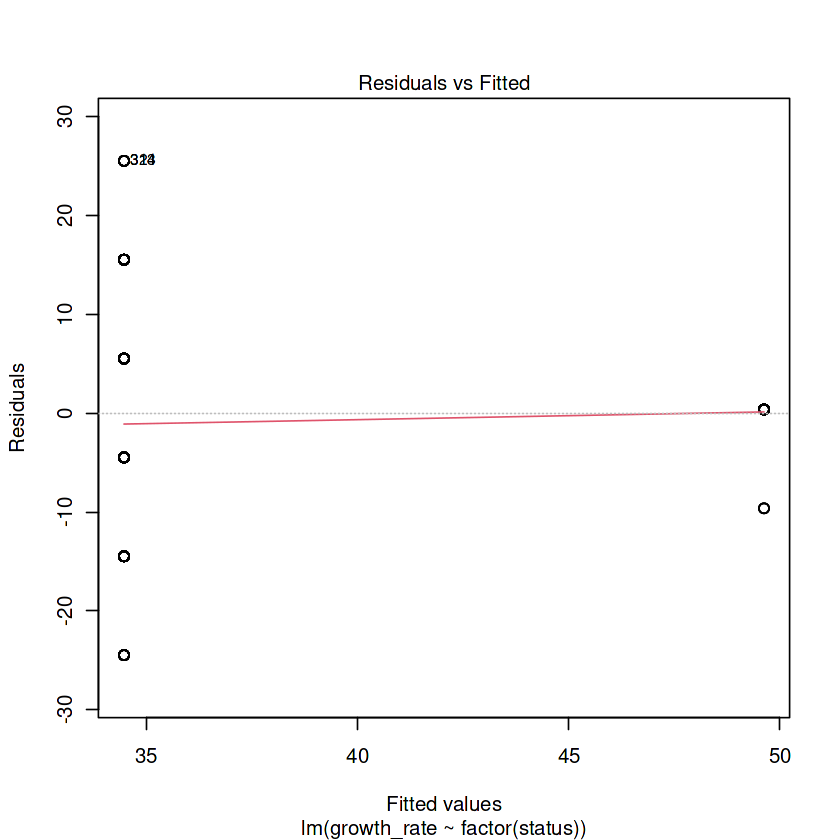

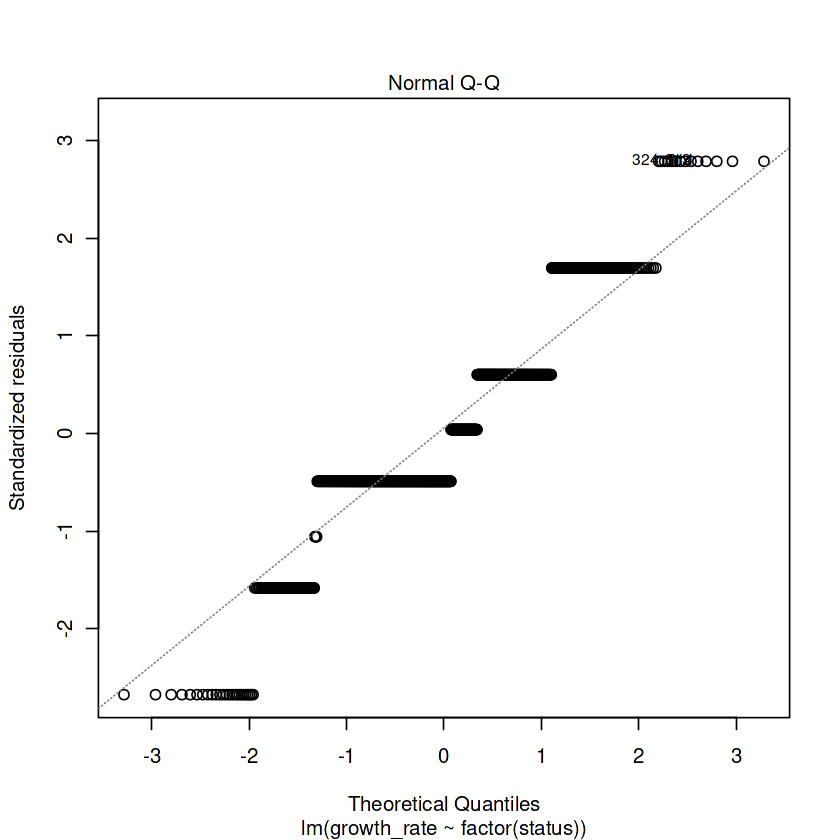

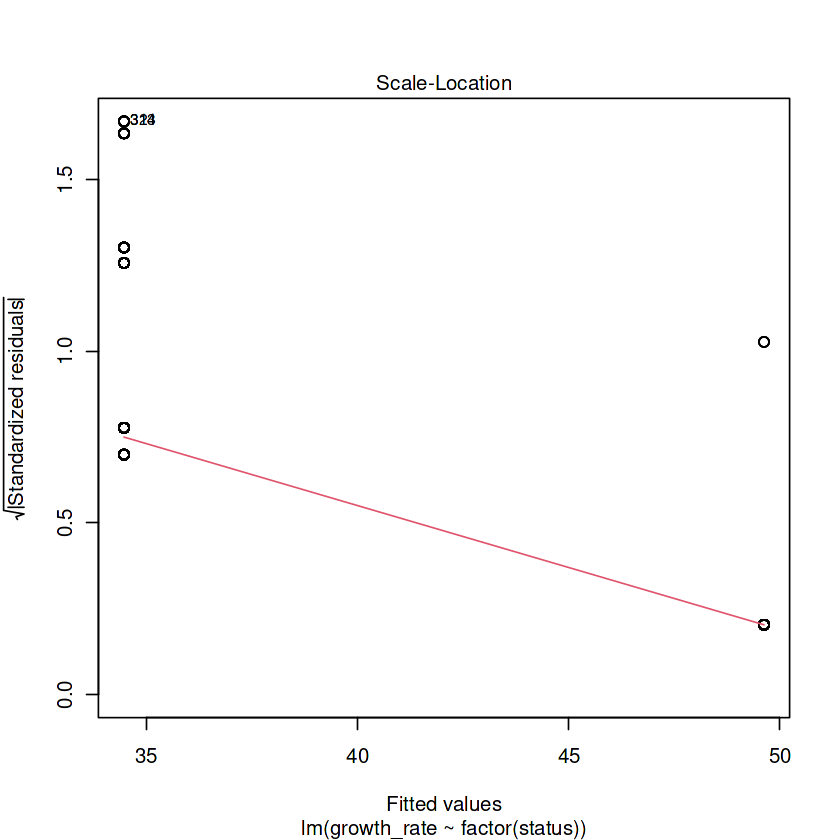

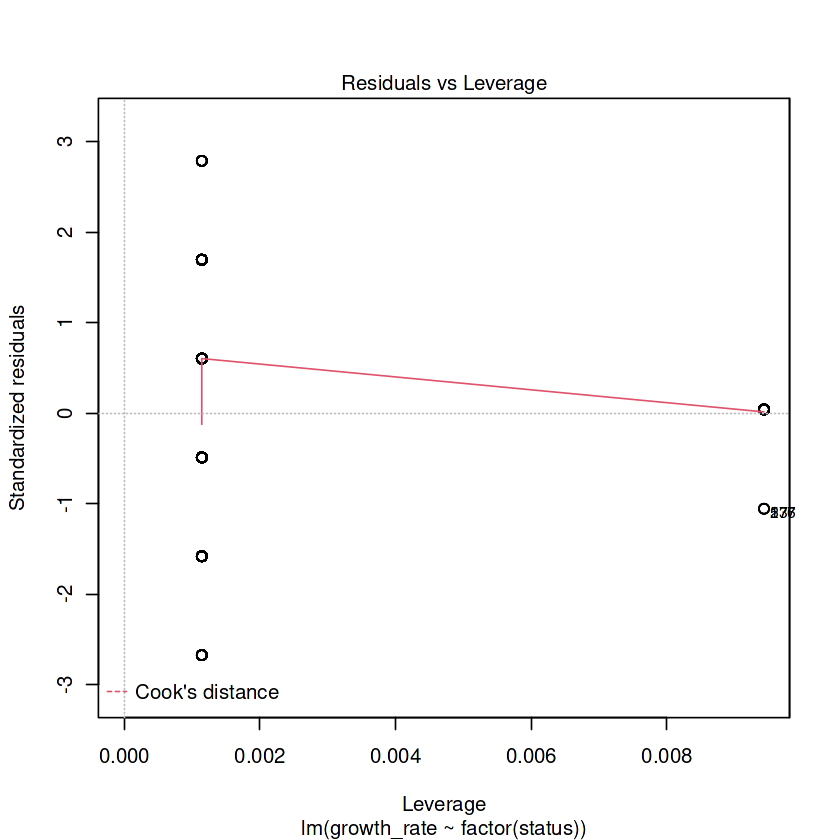

In [32]:
plot(model3_gr)

In [33]:
anova(model3_gr, model1_gr)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,976,81942.25,NA,NA,NA,NA
2,967,78384.71,9,3557.539,4.876433,2.087697e-06


In [34]:
model4_gr <- lm(growth_rate ~ factor(status) + attack + sp_defense + factor(status)*attack + factor(status)*sp_defense)
summary(model4_gr)


Call:
lm(formula = growth_rate ~ factor(status) + attack + sp_defense + 
    factor(status) * attack + factor(status) * sp_defense)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.711  -4.972  -1.971   5.397  27.858 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                32.46414    1.11368  29.150  < 2e-16 ***
factor(status)1            16.31777    5.18634   3.146  0.00170 ** 
attack                      0.06142    0.01097   5.600  2.8e-08 ***
sp_defense                 -0.03775    0.01247  -3.029  0.00252 ** 
factor(status)1:attack     -0.05695    0.03161  -1.802  0.07187 .  
factor(status)1:sp_defense  0.04129    0.03342   1.235  0.21698    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.015 on 972 degrees of freedom
Multiple R-squared:  0.2377,	Adjusted R-squared:  0.2338 
F-statistic: 60.61 on 5 and 972 DF,  p-value: < 2.2e-16


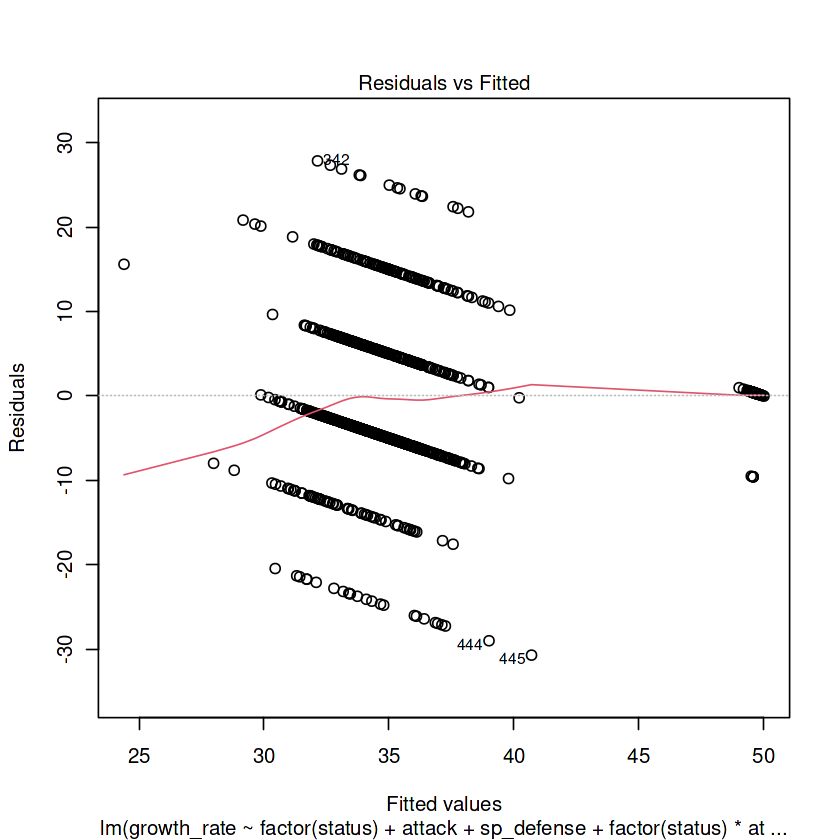

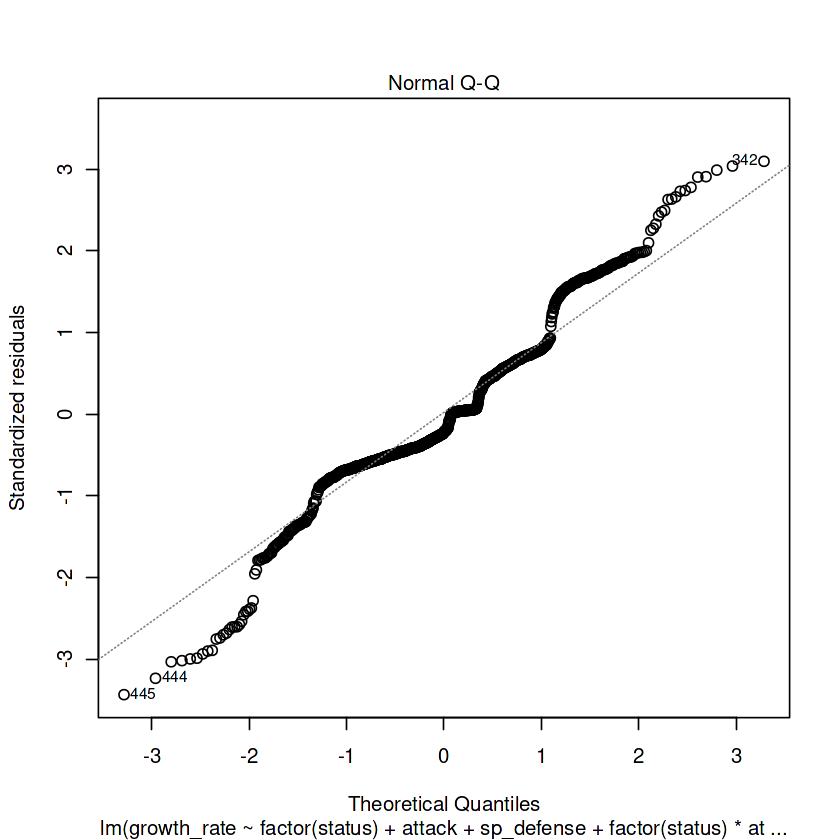

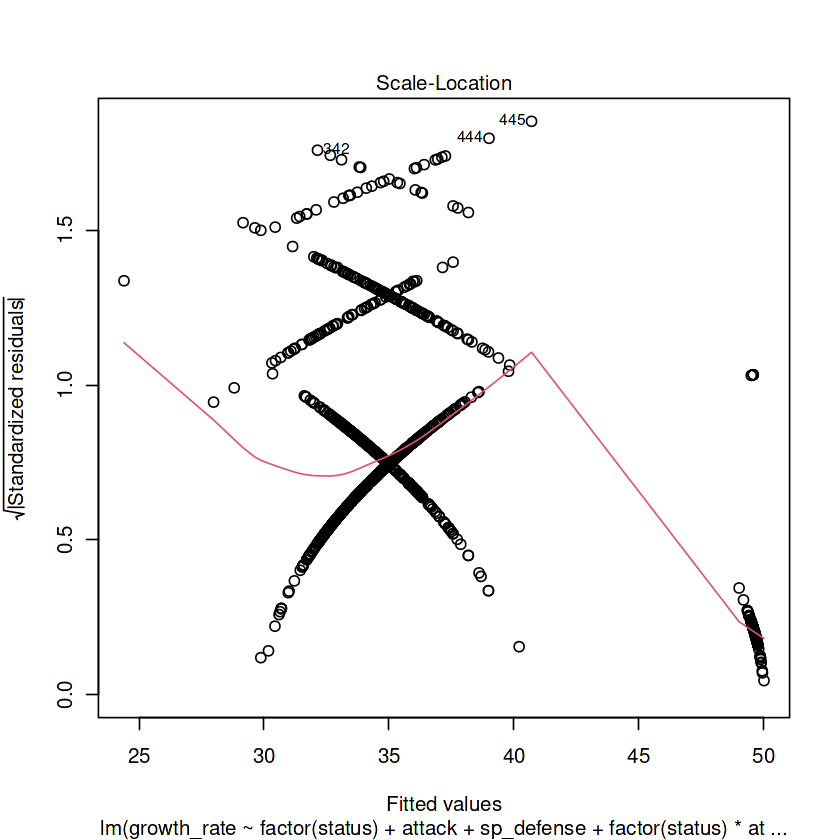

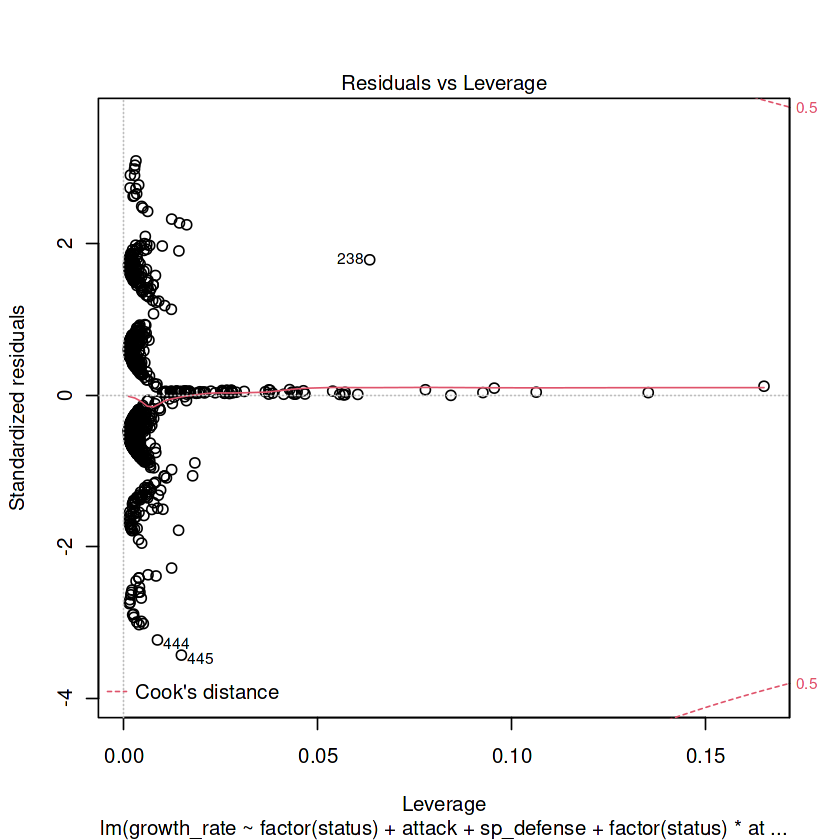

In [35]:
plot(model4_gr)

In [36]:
anova(model4_gr, model1_gr)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,972,79002.72,NA,NA,NA,NA
2,967,78384.71,5,618.0173,1.524845,0.1793225
